# TAREA 1

1.−  Realice un notebook en el se programen y expliquen los siguientes algoritmos de integración de ecuaciones diferenciales:

(a)Integración con método de Euler

(b)Integración sobre serie de Taylor a 2o orden

(c)Integración con método de Runge-Kutta de 2o orden

(d)Integración con método de Runge-Kutta de 4o orden

Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para $y(t)$:
$$\ddot x+0.5\dot x+sin(x)=e^{−t}sin(3t)$$
Con condiciones iniciales $\dot x(0)=1$ y $x(0)=0$

In [17]:
#usaremos algunas librerias
from pylab import *
from numpy import *
%matplotlib inline

Para el metodo de Euler es necesario disminuir el orden de la EDO por tal mótivo tenemos que 
$$\dot x = y$$ 
$$\dot y = e^{-t}sin(3t)+0.5y+sin(x)$$
por lo que tenemos etnonces que
$$ x(0) = 0$$
$$y(0)=1$$
Definimos la función 

### EULER

In [28]:
#t_final limite de pasos, p_ini condición incial 
def euler(funcion,p_ini,x,h=0.01):
    #
    tiempos = arange(x[0],x[1] + h, h)
    y = zeros((len(tiempos),len(p_ini)))
    y[0,:] = p_ini
    for i in range(len(tiempos)-1):
        y[i+1] = y[i] + funcion(y[i],tiempos[i])*h
        #solucion = [tiempos,y]
    return tiempos,y


### Taylor

In [20]:
def taylor2(funcion, d_funcion, p_ini, x, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(tiempos)-1):
        f = ecuacion(solucion[i,:], tiempos[i])
        df, jacobiano = d_ecuacion(solucion[i,:], tiempos[i])
        solucion[i+1,:] = solucion[i,:]+h*f+(0.5*h*h*(df+dot(jacobiano, f)))
    return tiempos, solucion

In [30]:
def f(t,omega=1):
    return sin(omega*t)

def funcion3(x,t,ommega=1):
    y1 = x[1]
    y2 = -0.5*sin(ommega*t) - 4*sin(x[0]) -(0.1*x[1])
    return array ([y1,y2])



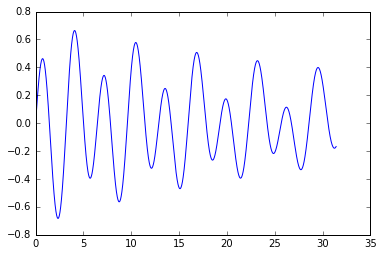

In [32]:
k = 1
while k <= 3:
    
    tiempos_euler, solucion_euler = euler(funcion3, array([0.0, 1.0]), [0, 10*pi])
    plot(tiempos_euler, solucion_euler[:,0], label="Euler")